# 1
Загрузити файл з даними про споживання енергії “En_In.xls”, який являє
собою перелік показників енергозабезпечення та виробництва відновлюваної
електроенергії, і ввести їх в DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel
file = 'En_In.xls'

energy = pd.read_excel(file, header = 16)
energy['Country'] = energy['Unnamed: 1']
energy = energy[['Country','Energy Supply', 'Energy Supply per capita', 'Renewable Electricity Production']][1:220]
energy

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,321,10,78.6693
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,...,...,0.641026
5,Andorra,9,121,88.6957
...,...,...,...,...
215,United Kingdom of Great Britain and Northern I...,7920,124,10.6005
216,United Republic of Tanzania,994,20,31.0728
217,United States of America,90838,286,11.571
218,United States Virgin Islands,...,...,0


# 2
Переведіть дані із стовпчику ‘Energy Supply’ в гДж (Примітка: в 1ПДж
= 1000000 ГДж). Для всіх країн, у яких відсутні дані (наприклад, дані з
&quot;.....&quot;), переконайтеся, що це відображається як значення np.NaN.

In [8]:
energy = energy.replace(r'\.', np.nan, regex = True)
energy["Energy Supply"] = energy["Energy Supply"] * 1_000_000
energy

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
1,Afghanistan,3.210000e+14,10.0,78.669280
2,Albania,1.020000e+14,35.0,100.000000
3,Algeria,1.959000e+15,51.0,0.551010
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9.000000e+12,121.0,88.695650
...,...,...,...,...
215,United Kingdom,7.920000e+15,124.0,10.600470
216,United Republic of Tanzania,9.940000e+14,20.0,31.072840
217,United States,9.083800e+16,286.0,11.570980
218,United States Virgin Islands,NaN,NaN,0.000000


# 3 - 4
Перейменуйте наступний список країн:
&quot;Republic of Korea&quot;: &quot;South Korea&quot;,
&quot;United States of America&quot;: &quot;United States&quot;, &quot;
United Kingdom of Great Britain and Northern Ireland&quot;: &quot;United
Kingdom&quot;,
&quot;China, Hong Kong Special Administrative Region&quot;: &quot;Hong Kong&quot;

Існує також декілька країн, що мають в назві цифри та/або дужки.
Обов’язково видаліть їх, напр. &#39;Bolivia (Plurinational State of)&#39;
повинна бути ‘Bolivia’, ‘Switzerland17’ повинна бути Switzerland’.

In [11]:
NewCountry = {'Korea,Rep' : 'South Korea',
             'Iran, Islamic Rep': 'Iran',
             'Iran (Islamic Republic of)': 'Iran',
             'Hong Kong SAR, CHina': 'Hong Kong',
             'Republic of Korea': 'South Korea',
             'United States of America': 'United States',
             'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
             'China, Hong Kong Special Administrative Region': 'Hong Kong'}
energy = energy.replace(NewCountry)
def correct_country_name(s):
    res = []
    for e in s:
        if e.isdigit():
            continue
        elif e == "(":
            break
        else:
            res.append(e)
    return "".join(res).rstrip()

energy["Country"] = energy["Country"].apply(lambda x: correct_country_name(x))
energy.loc[energy["Country"].isin(["American Samoa", "South Korea", "Bolivia"])]

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
4,American Samoa,NaN,NaN,0.641026
25,Bolivia,3.360000e+14,32.0,31.477120
165,South Korea,1.100700e+16,221.0,2.279353


# 5
Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані
Світового банку про ВВП країн від 1960 до 2015 року.

In [9]:
gpd = pd.read_csv('gpd.csv',header =4)
gpd = gpd.replace(NewCountry)
gpd = gpd.set_index("Country Name")
gpd= gpd.loc[:,'2006': '2015']
gpd.shape

(264, 10)

# 6
Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій.

In [10]:
Scimagojr = pd.read_excel("scimagojr.xlsx")[:15].replace(NewCountry)
Scimagojr


,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


# 7
Приєднайте три набори даних із завдань 1-6 до нового набору даних
(використовуючи перетин назв країн).
- Використовуйте лише дані про ВВП за останні 10 років (2006-2015 рр.) і
лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15)
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають
бути [&#39;Rank&#39;, &#39;Documents&#39;, &#39;Citable documents&#39;, &#39;Citations&#39;, &#39;Self-citations&#39;,
&#39;Citations per document&#39;, &#39;H index&#39;, &#39;Energy Supply&#39;, &#39;Energy Supply per Capita&#39;, &#39;%
Renewable&#39;, &#39;2006&#39;, &#39;2007&#39;, &#39;2008&#39;, &#39;2009&#39;, &#39;2010&#39;, &#39;2011&#39;, &#39;2012&#39;, &#39;2013&#39;, &#39;2014&#39;,
&#39;2015&#39;].
Ви повинні отримати DataFrame з 15 рядками та 20 стовпцями.

In [14]:
Dataset = pd.merge(Scimagojr[Scimagojr['Rank'] <=15], energy,  on="Country")

Dataset = Dataset.set_index("Country")
Dataset = Dataset.join(gpd)
Dataset.head(3)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per capita,Renewable Electricity Production,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [31]:
Dataset.shape

(15, 20)

# 8 - 15
### Створіть функцію, щоб визначити середній ВВП країн за останні 10 років.
### Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.
### Створіть функцію, щоб визначити, в якій країні встановлено максимумпоновлюваних джерел енергії (% Renewable) та який саме відсоток.
### Створіть стовпець, в якому оцінюється чисельність населення. Дляпошуку оцінки використовуйте значення енергопостачання (Energy Supply) та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?
### Створіть стовпець, в якому оцінюється кількість цитованих документів наодну особу. Який взаємозв&#39;язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використовуйте метод .corr () (кореляція Пірсона).
### Створіть новий стовпчик в який занесіть 1, якщо значення % відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для всіх країн, і 0, якщо значення (% Renewable) нижче медіани.
### Використайте наступний словник, щоб згрупувати країни за континентами, потім створіть DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення для кожної країни.
### Створіть бульбашкову діаграму, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки відповідає ВВП країн 2015 року, а колір відповідає континенту.

In [12]:
def task_eight():
    sred_vvp = Dataset.loc[:,'2006':'2015'].mean(1).sort_values(ascending = False)
    return sred_vvp
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea                    NaN
Iran                           NaN
dtype: float64

In [15]:
def task_nine():
    countryS = tuple(task_eight().items())[4][0]
    return (countryS, abs(Dataset.loc[countryS,'2015'] - Dataset.loc[countryS,'2006']))
task_nine()

('France', 153345695364.24023)

In [16]:
def task_ten():
    return tuple(Dataset.sort_values(by='Renewable Electricity Production')['Renewable Electricity Production'].tail(1).items())[0] 
task_ten()

('Brazil', 69.64803)

In [22]:
def task_eleven():
    Dataset['population'] = Dataset['Energy Supply'] / Dataset['Energy Supply per capita']
    return tuple(Dataset['population'].sort_values(ascending = False).items())[5]
task_eleven()

('Japan', 127409395.97315437)

In [34]:
Dataset.columns
def task_twelve():
    Dataset['Citable documents per Capita'] = Dataset['Citable documents'] / Dataset['population']
    return Dataset[['Citable documents per Capita', 'Energy Supply per capita']].corr().iloc()[1][0]
task_twelve()
    

0.7940010435442943

In [35]:
def task_thirteen():
    Dataset['More renewable'] = Dataset['Renewable Electricity Production'].apply(lambda x: 1 if x>= Dataset['Renewable Electricity Production'].median() else 0)
    return Dataset['More renewable']

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: More renewable, dtype: int64

In [36]:
def task_fourteen():
    ContDict = {'China':'Asia','United States': 'North America',
               'Japan':'Asia','United Kingdom':'Europe','Russian Federation':'Europe','Canada':'North America', 'Germany':'Europe','India':'Asia','France':'Europe','South Korea':'Asia','Italy':'Europe','Spain':'Europe','Iran':'Asia','Australia':'Australia','Brazil':'South America'}
    return Dataset.groupby(ContDict)['population'].agg(['size','sum','mean','std'])

task_fourteen()

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


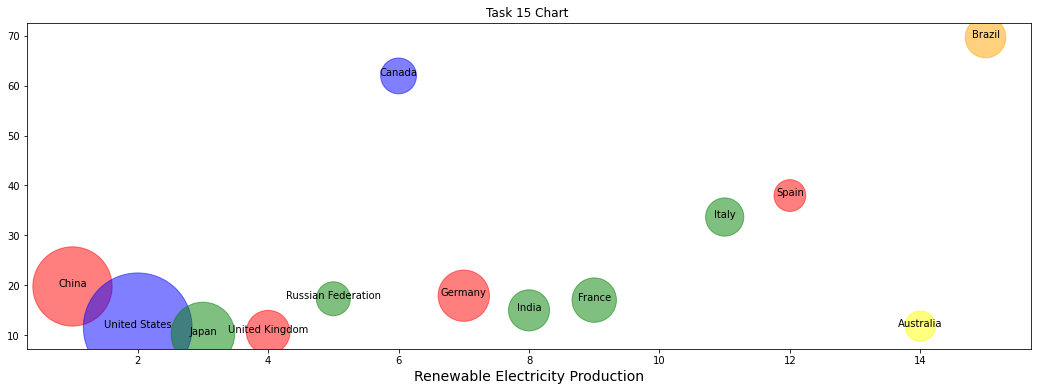

In [42]:
colors = ['red','blue','red','green','green','blue','green','red','green','green','green','green','green','yellow','orange']

plt.figure(figsize = (18,6))
plt.scatter(Dataset['Rank'], Dataset['Renewable Electricity Production'],s = Dataset['2015']/1400000000, color = colors,alpha = 0.5)

for i in range(len(Dataset)):
    plt.annotate(Dataset.iloc()[i].name, xy =(Dataset.iloc()[i]['Rank'],Dataset.iloc()[i]['Renewable Electricity Production']),ha='center')
plt.xlabel("Rank",size = 14)
plt.xlabel('Renewable Electricity Production', size = 14)
plt.title("Task 15 Chart ")
plt.show()